In [1]:
import numpy as np
import sympy as sy
sy.init_printing()

In [2]:
row,col=2,2
kwds=['x{}(0:{})'.format(i,col) for i in range(row) ]
symbols_row_col=np.array([sy.symbols(kwd) for kwd in kwds]).reshape(row,col)
symbols_row_col=sy.Matrix(symbols_row_col)


In [3]:
x=sy.symbols('x')
x

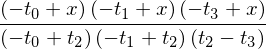

In [4]:
size=4
kwd_ts='t(0:{})'.format(size)
t=sy.symbols(kwd_ts)

list_size=[i for i in range(size)]
i=2
lix=sy.prod([(x-t[k])/(t[i]-t[k]) for k in filter(lambda x:x is not i, list_size)])
lix

In [5]:
xs=[0.0,0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8,2.0]
ys=[2.0,2.1,1.6,2.6,1.5,2.7,0.67,3.5,0.94,2.0]
len(xs)

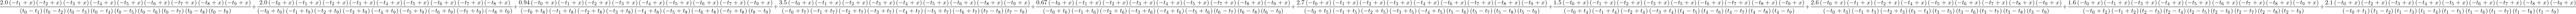

In [6]:
xs=[0.0,0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8,2.0]
ys=[2.0,2.1,1.6,2.6,1.5,2.7,0.67,3.5,0.94,2.0]
size=len(xs)
kwd_ts='t(0:{})'.format(size)
t=sy.symbols(kwd_ts)
x=sy.symbols('x')
x
list_size=[i for i in range(size)]
lixs=[]
for i in range(size):
    lixs.append(sy.prod([(x-t[k])/(t[i]-t[k]) for k in filter(lambda x:x is not i, list_size)]))
Px=0
for i in range(size):
    Px+=ys[i]*lixs[i]
Px

In [7]:
subs={t[k]:xs[k] for k in range(size)}
P_subts=Px.subs(subs)

In [8]:

legendre=sy.Lambda(x,P_subts.subs({x:x}))

In [9]:
pltx=np.linspace(0,2,100)
myfunc=np.vectorize(legendre)
plty=myfunc(pltx)
print(plty)

[2.00000000000000 5.21057907440319 6.88577000639673 7.46310114806561
 7.29210213552447 6.64729253631776 5.73977316436325 4.72752493962344
 3.72451521817907 2.80870667831678 2.02905911963008 1.41160991496680
 0.964714349340236 0.683522685652140 0.553766514256015 0.554922772017295
 0.662819756603701 0.851745513264062 1.09611513432727 1.37174978607481
 1.65681666351031 1.93247557086811 2.18327443446972 2.39733277475188
 2.56634899595412 2.68546429506479 2.75301304618568 2.77018668248311
 2.74063537535115 2.67002919931731 2.56559797157528 2.43566656683092
 2.28920023139853 2.13537225518292 1.98316430633011 1.84100779092493
 1.71647276915780 1.61600923987487 1.54474399736686 1.50633476764026
 1.50288194625233 1.53489698607685 1.60132532110159 1.69962066154098
 1.82586655617796 1.97494028992859 2.14071346814999 2.31628303418819
 2.49422597308700 2.66687057225096 2.82657683917695 2.96601851713789
 3.07845909192000 3.15801424638069 3.19989339470890 3.20061321483212
 3.15817649542579 3.07221012

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

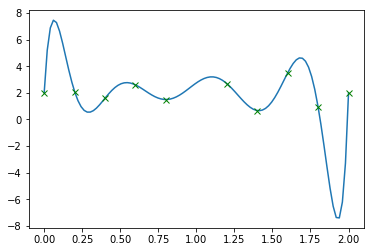

In [11]:
fig,ax=plt.subplots()
ax.plot(pltx,plty)
ax.plot(xs,ys,'gx')

In [12]:
# final code is....

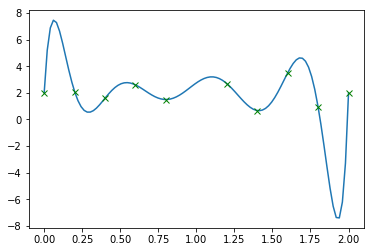

In [13]:
ts=[0.0,0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8,2.0]
ys=[2.0,2.1,1.6,2.6,1.5,2.7,0.67,3.5,0.94,2.0]
size=len(xs)
kwd_ts='t(0:{})'.format(size)
t=sy.symbols(kwd_ts)
x=sy.symbols('x')

itr=[i for i in range(size)]
lixs=[]
for i in range(size):
    lixs.append(sy.prod([(x-t[k])/(t[i]-t[k]) for k in filter(lambda x:x is not i, itr)]))
P_abstract=0
for i in range(size):
    P_abstract+=ys[i]*lixs[i]
    
vals={t[k]:ts[k] for k in range(size)}
Pts=P_abstract.subs(vals)

lagrange=sy.Lambda(x,Pts.subs({x:x}))
pltx=np.linspace(0,2,100)
lagrange=np.vectorize(lagrange)
plty=lagrange(pltx)

fig,ax=plt.subplots()
ax.plot(pltx,plty)
ax.plot(xs,ys,'gx')

# vandermonde

In [14]:
xs=[0.0,0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8,2.0]
ys=[2.0,2.1,1.6,2.6,1.5,2.7,0.67,3.5,0.94,2.0]
vander=np.vander(xs)
vander
solve=np.linalg.inv(vander) @ ys
solve

array([  5.47970834e+02,  -4.82500672e+03,   1.77785657e+04,
        -3.55800678e+04,   4.19740211e+04,  -2.95990240e+04,
         1.20294681e+04,  -2.53055213e+03,   2.05373611e+02,
         2.00000000e+00])

In [15]:
legendre(0)

In [16]:
power=[x**k for k in range(size)[::-1]]
testfunc=sy.Lambda(x,np.dot(solve,power).subs({x:x}))

In [17]:
legendre(38)

In [18]:
testfunc(38)

In [19]:
testfunc

Lambda(x, 547.970834022907*x**9 - 4825.0067171028*x**8 + 17778.565744899*x**7 - 35580.0677910566*x**6 + 41974.0211124125*x**5 - 29599.0239542425*x**4 + 12029.4681024198*x**3 - 2530.55213293991*x**2 + 205.373611111376*x + 2.0)


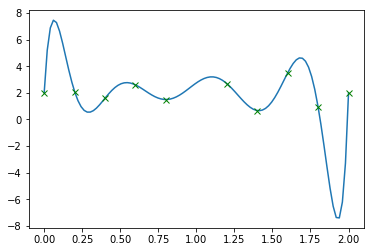

In [20]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
%matplotlib inline
sy.init_printing()
xs=[0.0,0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8,2.0]
ys=[2.0,2.1,1.6,2.6,1.5,2.7,0.67,3.5,0.94,2.0]
size=len(xs)
vander=np.vander(xs)
coeff=np.linalg.inv(vander) @ ys
x=sy.symbols('x')
power=[x**k for k in range(size)[::-1]]
lagrange_poly=sy.Lambda(x,np.dot(coeff,power).subs({x:x}))
print(lagrange_poly)
lagrange_poly=np.vectorize(lagrange_poly)
pltx=np.linspace(0,2,100)
plty=lagrange_poly(pltx)
fig,ax=plt.subplots()
ax.plot(pltx,plty)
ax.plot(xs,ys,'gx')

In [21]:
lagrange_poly
